# Assignment 18(Q1 )

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [108]:
df = pd.read_excel(r'C:\Users\Suneetha\python files\Airlines+Data.xlsx")

In [109]:
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [110]:
df1=df.copy()

In [111]:
df1

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [112]:
df1.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [113]:
df1.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [114]:
df1.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [115]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,96.0,213.708333,71.918216,104.0,156.0,200.0,264.75,413.0


In [116]:
df1 = df1.set_index('Month')

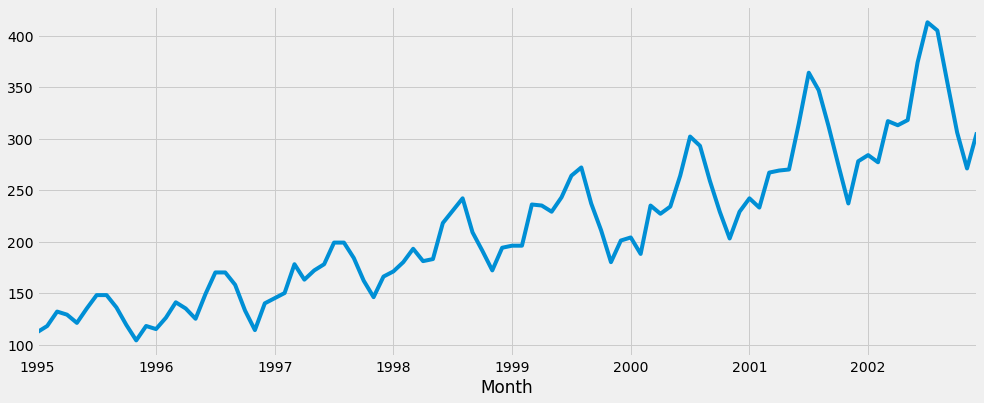

In [117]:
df1['Passengers'].plot(figsize=(15, 6))
plt.show()

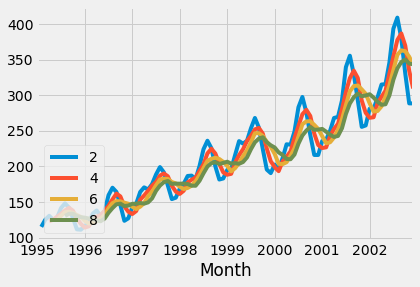

In [118]:
for i in range(2,10,2):
    df1['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

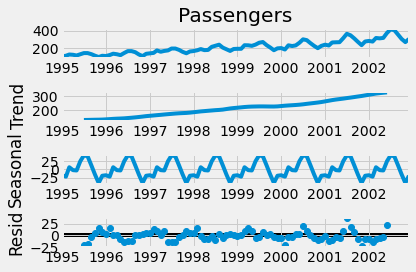

In [119]:
ts_add = seasonal_decompose(df1['Passengers'],model="additive")
fig = ts_add.plot()
plt.show()

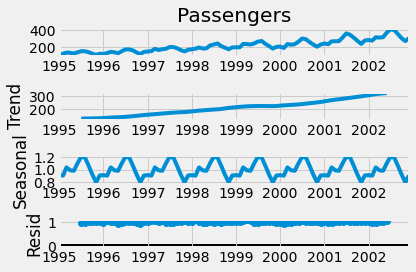

In [120]:
ts_mul = seasonal_decompose(df1.Passengers,model="multiplicative")
fig = ts_mul.plot()
plt.show()

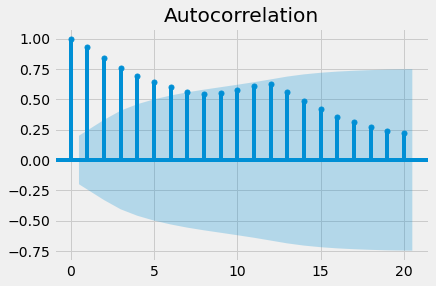

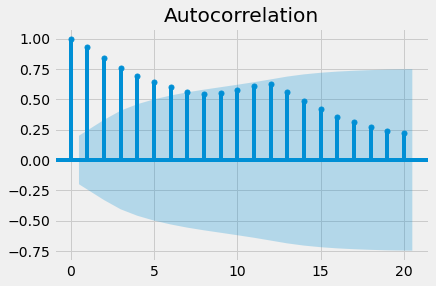

In [121]:
tsa_plots.plot_acf(df1['Passengers'])

# Building Time series forecasting with ARIMA

In [122]:
X = df1['Passengers'].values

In [123]:
size = int(len(X) * 0.66)

In [124]:
train, test = X[0:size], X[size:len(X)]

In [125]:
model = ARIMA(train, order=(5,1,0))

In [126]:
model_fit = model.fit(disp=0)

In [127]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   62
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -262.909
Method:                       css-mle   S.D. of innovations             16.748
Date:                Tue, 31 May 2022   AIC                            539.817
Time:                        11:17:05   BIC                            554.707
Sample:                             1   HQIC                           545.663
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7497      1.477      1.185      0.236      -1.145       4.644
ar.L1.D.y      0.0905      0.134      0.677      0.498      -0.171       0.352
ar.L2.D.y     -0.2096      0.135     -1.549      0.1

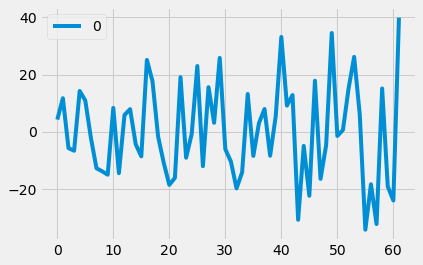

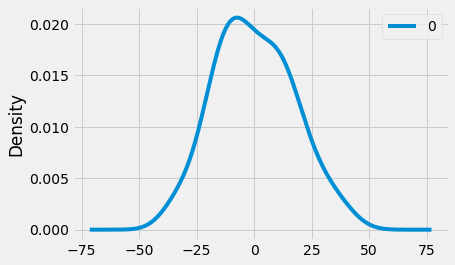

               0
count  62.000000
mean    0.057357
std    16.895802
min   -34.303292
25%   -12.610645
50%    -1.589470
75%    12.565607
max    39.955361


In [128]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

# The plot of the residual errors suggests that there may still be some trend information not captured by the model
# The results show that there is no a bias in the prediction (a zero mean in the residuals)
 

# Rolling Forecast ARIMA Model

In [131]:
history = [x for x in train]

In [132]:
predictions = list()

In [133]:
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=239.755183, expected=227.000000
predicted=220.737304, expected=234.000000
predicted=237.815000, expected=264.000000
predicted=252.750570, expected=302.000000
predicted=306.715787, expected=293.000000
predicted=285.374646, expected=259.000000
predicted=250.264015, expected=229.000000
predicted=227.093112, expected=203.000000
predicted=211.011449, expected=229.000000
predicted=253.260279, expected=242.000000
predicted=252.490683, expected=233.000000
predicted=234.042133, expected=267.000000
predicted=268.773632, expected=269.000000
predicted=261.782261, expected=270.000000
predicted=271.798051, expected=315.000000
predicted=314.422103, expected=364.000000
predicted=368.637692, expected=347.000000
predicted=334.957878, expected=312.000000
predicted=301.161841, expected=274.000000
predicted=265.936460, expected=237.000000
predicted=244.037204, expected=278.000000
predicted=312.961782, expected=284.000000
predicted=291.748151, expected=277.000000
predicted=284.551896, expected=317

In [134]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 782.495


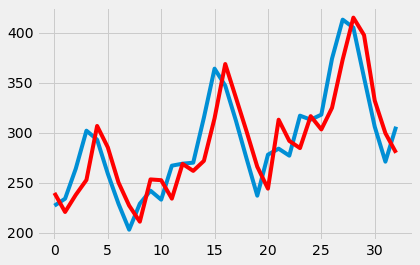

In [135]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# A line plot is created showing the expected values (blue) compared to the rolling forecast predictions (red). We can see the values show some trend and are in the correct scale

# Comparing Multiple Models

In [159]:
data = df.copy()
data['t'] = range(1, len(data)+1)
data['t_square'] = data['t']**2
data['Date'] = pd.to_datetime(data['Month'], format="%b-%y")
data['month'] = data['Date'].dt.strftime('%b')
data['year'] = data['Date'].dt.strftime('%Y')
data

,Month,Passengers,t,t_square,Date,month,year
0,1995-01-01,112,1,1,1995-01-01,Jan,1995
1,1995-02-01,118,2,4,1995-02-01,Feb,1995
2,1995-03-01,132,3,9,1995-03-01,Mar,1995
3,1995-04-01,129,4,16,1995-04-01,Apr,1995
4,1995-05-01,121,5,25,1995-05-01,May,1995
...,...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,2002-08-01,Aug,2002
92,2002-09-01,355,93,8649,2002-09-01,Sep,2002
93,2002-10-01,306,94,8836,2002-10-01,Oct,2002
94,2002-11-01,271,95,9025,2002-11-01,Nov,2002


In [160]:
data_1 = data.drop(columns = ['Date','year','Month'])
df2 = pd.get_dummies(data_1)


In [161]:
df2

,Passengers,t,t_square,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,112,1,1,0,0,0,0,1,0,0,0,0,0,0,0
1,118,2,4,0,0,0,1,0,0,0,0,0,0,0,0
2,132,3,9,0,0,0,0,0,0,0,1,0,0,0,0
3,129,4,16,1,0,0,0,0,0,0,0,0,0,0,0
4,121,5,25,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,405,92,8464,0,1,0,0,0,0,0,0,0,0,0,0
92,355,93,8649,0,0,0,0,0,0,0,0,0,0,0,1
93,306,94,8836,0,0,0,0,0,0,0,0,0,0,1,0
94,271,95,9025,0,0,0,0,0,0,0,0,0,1,0,0


In [162]:
t= np.arange(1,97)

In [163]:
df2['t'] = t

In [164]:
df2['t_sq'] = df2['t']*df2['t']

In [165]:
log_Passengers=np.log(df2['Passengers'])

In [166]:
df2['log_Passengers']=log_Passengers

In [144]:
df2.head()

,Passengers,t,t_square,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,t_sq,log_Passengers
0,112,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,4.718499
1,118,2,4,0,0,0,1,0,0,0,0,0,0,0,0,4,4.770685
2,132,3,9,0,0,0,0,0,0,0,1,0,0,0,0,9,4.882802
3,129,4,16,1,0,0,0,0,0,0,0,0,0,0,0,16,4.859812
4,121,5,25,0,0,0,0,0,0,0,0,1,0,0,0,25,4.795791


In [158]:
df2.tail()

,Passengers,t,t_square,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,t_sq,log_Passengers
91,405,92,8464,0,1,0,0,0,0,0,0,0,0,0,0,8464,6.003887
92,355,93,8649,0,0,0,0,0,0,0,0,0,0,0,1,8649,5.872118
93,306,94,8836,0,0,0,0,0,0,0,0,0,0,1,0,8836,5.723585
94,271,95,9025,0,0,0,0,0,0,0,0,0,1,0,0,9025,5.602119
95,306,96,9216,0,0,1,0,0,0,0,0,0,0,0,0,9216,5.723585


In [145]:
train1, test1 = np.split(df2, [int(.67 *len(df2))])

In [146]:
linear= smf.ols('Passengers ~ t',data=train1).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test1['t'])))
rmselin=np.sqrt((np.mean(np.array(test1['Passengers'])-np.array(predlin))**2))
rmselin

25.503983516483537

In [147]:
quad=smf.ols('Passengers~t+t_sq',data=train1).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test1[['t','t_sq']])))
rmsequad=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predquad))**2))
rmsequad

53.18955514415421

In [148]:
expo=smf.ols('Passengers~t',data=train1).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test1['t'])))
rmseexpo=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(predexp)))**2))
rmseexpo

1.603094593327857e+128

In [149]:
additive= smf.ols('Passengers~ month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep',data=train1).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test1[['month_Apr','month_Aug','month_Dec','month_Feb','month_Jan','month_Jul','month_Jun','month_Mar','month_May','month_Nov','month_Oct','month_Sep']])))
rmseadd=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predadd))**2))
rmseadd

123.94935401651408

In [78]:
addlinear= smf.ols('Passengers~ mullin= smf.ols('log_Passengers~t+Month_1+Month_2+Month_3+Month_4+Month_5+Month_6+Month_7+Month_8+Month_9+Month_10+Month_11+Month_12',data=train1).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test1[['t','month_Apr','month_Aug','month_Dec','month_Feb','month_Jan','month_Jul','month_Jun','month_Mar','month_May','month_Nov','month_Oct','month_Sep']])))
rmseaddlinear=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predaddlinear))**2))
rmseaddlinear

123.94935401651408

In [79]:
addquad=smf.ols('Passengers~t+t_sq+month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep',data=train1).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test1[['t','t_sq','month_Apr','month_Aug','month_Dec','month_Feb','month_Jan','month_Jul','month_Jun','month_Mar','month_May','month_Nov','month_Oct','month_Sep']])))
rmseaddquad=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predaddquad))**2))
rmseaddquad

34.50350403858453

In [152]:
mulsea=smf.ols('log_Passengers~month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep',data=train1).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test1[['month_Apr','month_Aug','month_Dec','month_Feb','month_Jan','month_Jul','month_Jun','month_Mar','month_May','month_Nov','month_Oct','month_Sep']])))
rmsemul= np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(predmul)))**2))
rmsemul

127.83693479585914

In [153]:
mullin= smf.ols('log_Passengers~t+month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep',data=train1).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test1[['t','month_Apr','month_Aug','month_Dec','month_Feb','month_Jan','month_Jul','month_Jun','month_Mar','month_May','month_Nov','month_Oct','month_Sep']])))
rmsemulin=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(predmullin)))**2))
rmsemulin

12.759135120295412

In [154]:
mul_quad= smf.ols('log_Passengers~t+t_sq+month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep',data=train1).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test1[['t','t_sq','month_Apr','month_Aug','month_Dec','month_Feb','month_Jan','month_Jul','month_Jun','month_Mar','month_May','month_Nov','month_Oct','month_Sep']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

28.25957879074393

# Conclusion

In [155]:
output = {'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),
          'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}

In [156]:
rmse=pd.DataFrame(output)

In [157]:
print(rmse)

           Model         Values
0  rmse_mul_quad   2.825958e+01
1        rmseadd   1.239494e+02
2  rmseaddlinear   1.239494e+02
3    rmseaddquad   3.450350e+01
4       rmseexpo  1.603095e+128
5        rmselin   2.550398e+01
6        rmsemul   1.278369e+02
7      rmsemulin   1.275914e+01
8       rmsequad   5.318956e+01


# Multiplicative seasonality with linear trend has the best RMSE value
 

# Assignment 18( Q2 )

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [170]:
df = pd.read_excel("/Users/sachin/Downloads/CocaCola_Sales_Rawdata.xlsx")


In [171]:
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [172]:
df1 = df.copy()

In [173]:
df1.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [175]:
df1.tail()

,Quarter,Sales
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


In [176]:
df1.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [177]:
df1.dtypes

Quarter     object
Sales      float64
dtype: object

In [178]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,42.0,2994.353308,977.930896,1547.818996,2159.714247,2782.376999,3609.25,5253.0


In [179]:
temp = df1.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')

In [180]:
df1['quater'] = pd.to_datetime(temp).dt.strftime('%b-%Y')

In [181]:
df1.head()

,Quarter,Sales,quater
0,Q1_86,1734.827000,Jan-1986
1,Q2_86,2244.960999,Apr-1986
2,Q3_86,2533.804993,Jul-1986
3,Q4_86,2154.962997,Oct-1986
4,Q1_87,1547.818996,Jan-1987


In [182]:
df1 = df1.drop(['Quarter'], axis=1)

In [183]:
df1.reset_index(inplace=True)

In [184]:
df1['quater'] = pd.to_datetime(df1['quater'])

In [185]:
df1 = df1.set_index('quater')

In [186]:
df1.head()

,index,Sales
quater,,
1986-01-01,0,1734.827000
1986-04-01,1,2244.960999
1986-07-01,2,2533.804993
1986-10-01,3,2154.962997
1987-01-01,4,1547.818996


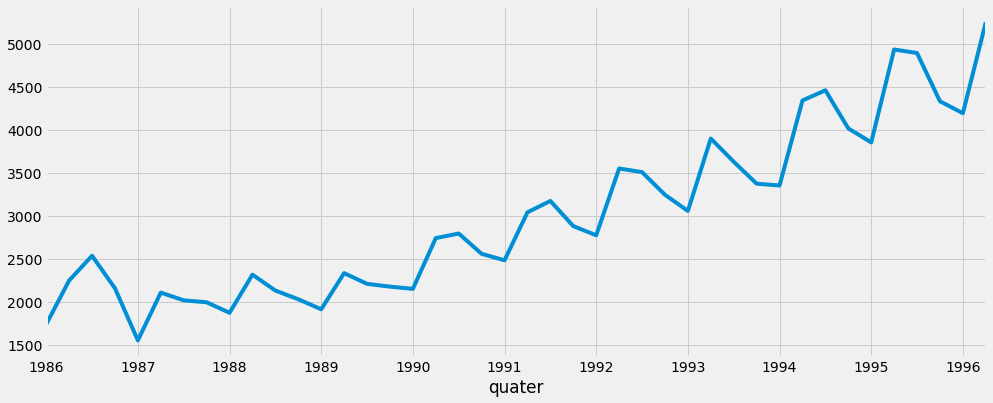

In [187]:
df1['Sales'].plot(figsize=(15, 6))
plt.show()

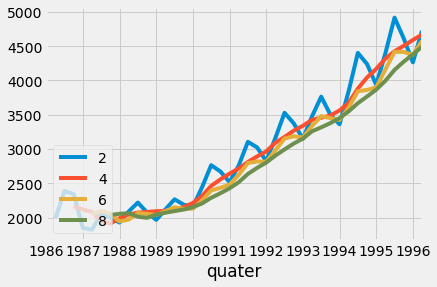

In [188]:
for i in range(2,10,2):
    df1["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

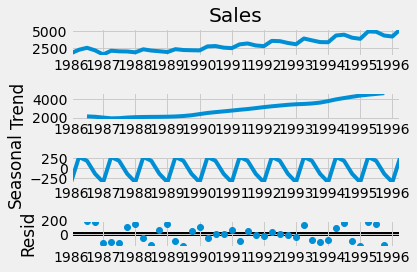

In [189]:
ts_add = seasonal_decompose(df1.Sales,model="additive")
fig = ts_add.plot()
plt.show()

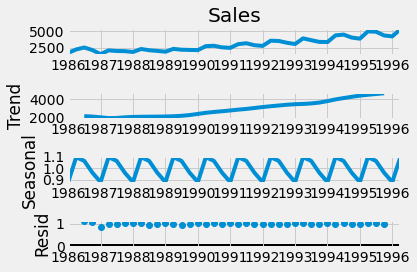

In [190]:
ts_mul = seasonal_decompose(df1.Sales,model="multiplicative")
fig = ts_mul.plot()
plt.show()

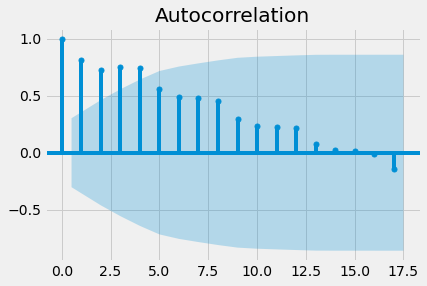

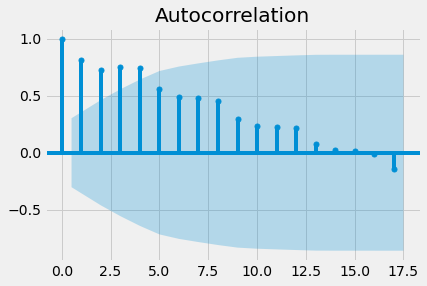

In [191]:
tsa_plots.plot_acf(df1.Sales)

# Building Time series forecasting with ARIMA

In [192]:
X = df1['Sales'].values

In [193]:
size = int(len(X) * 0.66)

In [194]:
train, test = X[0:size], X[size:len(X)]


In [195]:
model = ARIMA(train, order=(5,1,0))

In [196]:
model_fit = model.fit(disp=0)

In [197]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   26
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -172.036
Method:                       css-mle   S.D. of innovations            163.191
Date:                Tue, 31 May 2022   AIC                            358.071
Time:                        18:15:13   BIC                            366.878
Sample:                             1   HQIC                           360.607
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.8437     26.509      1.578      0.114     -10.112      93.800
ar.L1.D.y     -0.1479      0.195     -0.758      0.448      -0.530       0.234
ar.L2.D.y     -0.3127      0.157     -1.996      0.0

# This summarizes the coefficient values used as well as the skill of the fit on the on the in-sample observations

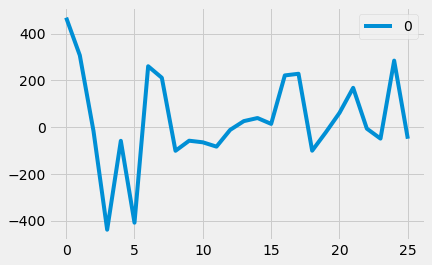

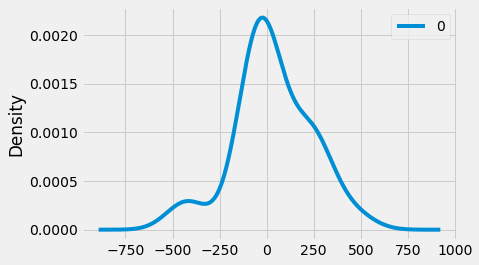

                0
count   26.000000
mean    31.325539
std    202.029794
min   -438.905377
25%    -58.603308
50%     -9.190738
75%    200.236268
max    468.290316


In [198]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

# The plot of the residual errors suggests that there may still be some trend information not captured by the model
# The results show that indeed there is a bias in the prediction (a non-zero mean in the residuals)

# Rolling Forecast ARIMA Model

In [210]:
history = [x for x in train]

In [211]:
predictions = list()


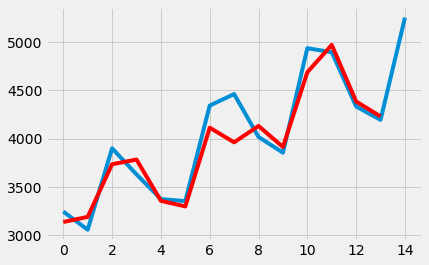

In [215]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# A line plot is created showing the expected values (blue) compared to the rolling forecast predictions (red). We can see the values show some trend and are in the correct scale


# Comparing Multiple Models

In [216]:
df2 = pd.get_dummies(df, columns = ['Quarter'])

In [217]:
df2.columns = ['Sales','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4']

In [218]:
df2.head()

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2154.962997,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [219]:
t= np.arange(1,43)

In [220]:
df2['t'] = t

In [221]:
df2['t_sq'] = df2['t']*df2['t']

In [222]:
log_Sales=np.log(df2['Sales'])

In [223]:
df2['log_Sales']=log_Sales

In [224]:
df2.head()

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,t,t_sq,log_Sales
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,7.458663
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,7.716443
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,9,7.837477
3,2154.962997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,16,7.675529
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,25,7.344602


In [225]:
train1, test1 = np.split(df2, [int(.67 *len(df2))])

In [226]:
linear= smf.ols('Sales ~ t',data=train1).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test1['t'])))
rmselin=np.sqrt((np.mean(np.array(test1['Sales'])-np.array(predlin))**2))
rmselin

580.1224130918641

In [227]:
quad=smf.ols('Sales~t+t_sq',data=train1).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test1[['t','t_sq']])))
rmsequad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predquad))**2))
rmsequad

783.7297975037103

In [228]:
expo=smf.ols('log_Sales~t',data=train1).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test1['t'])))
rmseexpo=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo

588.1405104900134

In [229]:
additive= smf.ols('Sales~ Q1+Q2+Q3+Q4',data=train1).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmseadd=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predadd))**2))
rmseadd

1869.7188209186947

In [230]:
addlinear= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train1).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmseaddlinear=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear

596.1526282372472

In [231]:
addquad=smf.ols('Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train1).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test1[['t','t_sq','Q1','Q2','Q3','Q4']])))
rmseaddquad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predaddquad))**2))
rmseaddquad

412.1144436053775

In [232]:
mulsea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train1).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmsemul= np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul

2374.9194407954374

In [233]:
mullin= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=train1).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmsemulin=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmullin)))**2))
rmsemulin

5359.687911932085

In [234]:
mul_quad= smf.ols('log_Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train1).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test1[['t','t_sq','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

3630.5619467347524

# Conclusion

In [235]:
output = {'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),
          'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}


In [236]:
rmse=pd.DataFrame(output)

In [237]:
print(rmse)

           Model       Values
0  rmse_mul_quad  3630.561947
1        rmseadd  1869.718821
2  rmseaddlinear   596.152628
3    rmseaddquad   412.114444
4       rmseexpo   588.140510
5        rmselin   580.122413
6        rmsemul  2374.919441
7      rmsemulin  5359.687912
8       rmsequad   783.729798


# Additive seasonality with quadratic trend has the best RMSE value